# 一个用于分析 median_coverage_genomes.parquet 文件的 Jupyter Notebook
本 Notebook 旨在分析 median_coverage_genomes.parquet 文件中的数据，探索其统计特性并进行可视化。

## 导入必要的库
导入 pandas、matplotlib 和 seaborn 等库，用于数据处理和可视化。

In [4]:
pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 2.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

## 加载数据
使用 pandas 的 read_parquet 方法加载 median_coverage_genomes.parquet 文件。

In [ ]:
# 加载数据
file_path = "/Users/azddza/Electromics-project/data/median_coverage_genomes.parquet"
df = pd.read_parquet(file_path)

# 检查数据加载是否成功
print(f"数据集包含 {df.shape[0]} 行和 {df.shape[1]} 列。")

数据集包含 15 行和 241 列。


## 数据预览
使用 head() 方法查看数据的前几行，并使用 info() 和 describe() 方法检查数据的基本信息和统计信息。

In [ ]:
# 数据预览
# 查看前几行
print(df.head())

# 检查数据的基本信息
print(df.info())

# 查看数据的统计信息
print(df.describe())

Genome      index   MAG001  MAG002  MAG003   MAG004  MAG005  MAG006  MAG007  \
0       NSg1AJ41C  144.805  106.79   23.15   97.310  80.285   24.04   23.51   
1       NSg1BJ41C    0.000  123.42   11.31  102.315  10.950   26.28   24.30   
2       NSg1CJ41C    0.000   71.37    0.00    0.000   0.640   22.18   28.28   
3         R1J142A    0.000    0.00    0.00    0.000   0.090    0.00    0.00   
4         R2J142A    0.000    0.00    0.00    0.000   0.000    0.00    0.00   

Genome  MAG008  MAG009  ...  MAG231  MAG232  MAG233  MAG234  MAG235  MAG236  \
0        46.90  116.28  ...     0.0    0.07    0.36     0.0    0.13     0.0   
1        54.29   68.63  ...     0.0    0.07    0.37     0.0    0.14     0.0   
2        41.80   39.50  ...     0.0    0.09    0.49     0.0    0.11     0.0   
3         0.00    0.00  ...     0.0    1.98    0.00     0.0    0.00     0.0   
4         0.00    0.00  ...     0.0    1.02    0.00     0.0    0.00     0.0   

Genome  MAG237  MAG238  MAG239  MAG240  
0        

## 统计描述
计算覆盖率的均值、中位数、标准差等统计指标，并分析数据分布。

In [15]:
sample_names = df.iloc[:, 0]
coverage_matrix = df.iloc[:, 1:]  # 从 MAG001 开始

# 计算每一行的总覆盖度（所有 MAG 的覆盖度和）
total_coverage_per_sample = coverage_matrix.sum(axis=1)

# 计算相对丰度（每个 MAG 的覆盖度 / 总覆盖度）
relative_abundance = coverage_matrix.div(total_coverage_per_sample, axis=0)

# 加回样本名
relative_abundance.insert(0, "Sample", sample_names)

# 查看结果
relative_abundance

Genome,Sample,MAG001,MAG002,MAG003,MAG004,MAG005,MAG006,MAG007,MAG008,MAG009,...,MAG231,MAG232,MAG233,MAG234,MAG235,MAG236,MAG237,MAG238,MAG239,MAG240
0,NSg1AJ41C,0.054366,0.040093,0.008691,0.036534,0.030142,0.009026,0.008827,0.017608,0.043656,...,0.000000,0.000026,0.000135,0.000000,0.000049,0.000000,0.000000,0.000503,0.000000,0.0000
1,NSg1BJ41C,0.000000,0.050180,0.004598,0.041599,0.004452,0.010685,0.009880,0.022073,0.027904,...,0.000000,0.000028,0.000150,0.000000,0.000057,0.000000,0.000000,0.000557,0.000000,0.0000
2,NSg1CJ41C,0.000000,0.030369,0.000000,0.000000,0.000272,0.009438,0.012034,0.017787,0.016808,...,0.000000,0.000038,0.000209,0.000000,0.000047,0.000000,0.000000,0.000536,0.000000,0.0000
3,R1J142A,0.000000,0.000000,0.000000,0.000000,0.000021,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
4,R2J142A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
5,R3J142A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.004000,0.000000,0.000000,0.000000,0.000510,0.000000,0.000000,0.000000,0.0000
6,R4J147A,0.000000,0.006760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000150,0.000029,...,0.000000,0.000000,0.000842,0.000000,0.000000,0.000000,0.000000,0.000075,0.000000,0.0000
7,R4J147C,0.000000,0.002058,0.000000,0.004176,0.000145,0.000000,0.000323,0.021337,0.000000,...,0.000000,0.000065,0.000000,0.000000,0.000145,0.000000,0.000000,0.000544,0.000000,0.0000
8,R5J141A,0.000000,0.006423,0.000056,0.000000,0.000000,0.000000,0.000006,0.000180,0.000000,...,0.000000,0.000000,0.000080,0.000000,0.000000,0.000000,0.000000,0.000062,0.000000,0.0000
9,R5J141C,0.000000,0.000480,0.000000,0.001034,0.002577,0.000000,0.000612,0.023001,0.000000,...,0.000000,0.000023,0.000000,0.000000,0.000185,0.000000,0.000000,0.000699,0.000000,0.0000


In [16]:
relative_abundance.to_csv("/Users/azddza/Electromics-project/data/relative_abundance.csv", index=False)


gtdb——taxonomy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
file_path = "/Users/azddza/Electromics-project/data/gtdb_taxonomy.tsv"
data = pd.read_csv(file_path, sep='\t')

# 基本统计
print(f"数据集包含 {data.shape[0]} 行和 {data.shape[1]} 列。")
print(f"包含的基因组数量: {data['user_genome'].nunique()}")
print(f"包含的领域(Domain)数量: {data['Domain'].nunique()}")

数据集包含 240 行和 8 列。
包含的基因组数量: 240
包含的领域(Domain)数量: 2



领域(Domain)分布:
Domain
Bacteria    226
Archaea      14
Name: count, dtype: int64


/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1923531538.py:14: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1923531538.py:14: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1923531538.py:14: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1923531538.py:14: UserWarning: Glyph 22240 (\N{CJK UNIFIED IDEOGRAPH-56E0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1923531538.py:14: UserWarning: Glyph 32452 (\N{CJK UNIFIED IDEOGRAPH-7EC4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrb

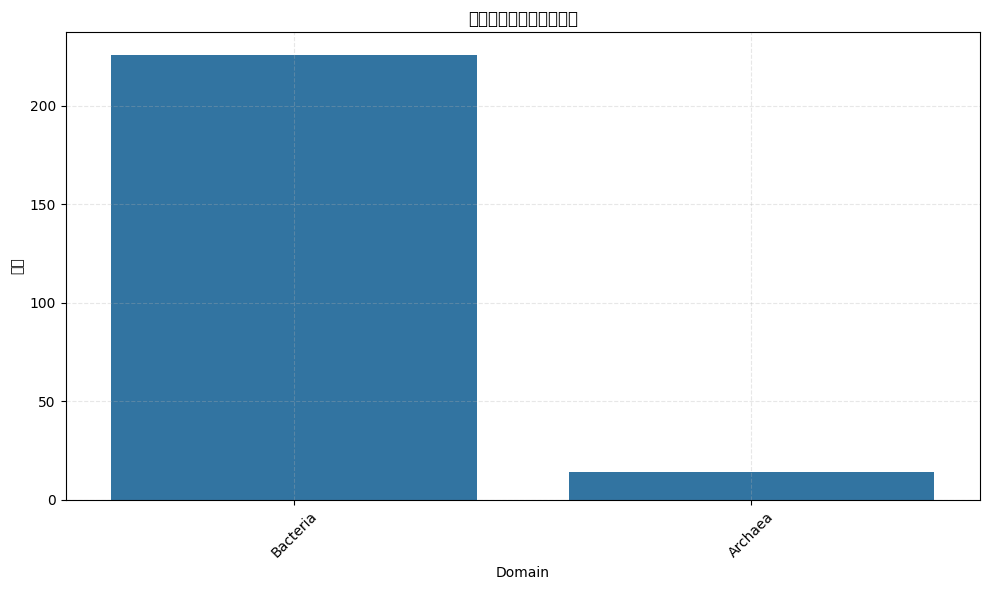

In [2]:
# 分析Domain分布
domain_counts = data['Domain'].value_counts()
print("\n领域(Domain)分布:")
print(domain_counts)

# 可视化Domain分布
plt.figure(figsize=(10, 6))
sns.barplot(x=domain_counts.index, y=domain_counts.values)
plt.title('基因组在不同领域的分布')
plt.xlabel('Domain')
plt.ylabel('数量')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


物种(species)列的完整性: 45.42%


/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/2321770828.py:16: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/2321770828.py:16: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/2321770828.py:16: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/2321770828.py:16: UserWarning: Glyph 32423 (\N{CJK UNIFIED IDEOGRAPH-7EA7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/2321770828.py:16: UserWarning: Glyph 32570 (\N{CJK UNIFIED IDEOGRAPH-7F3A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrb

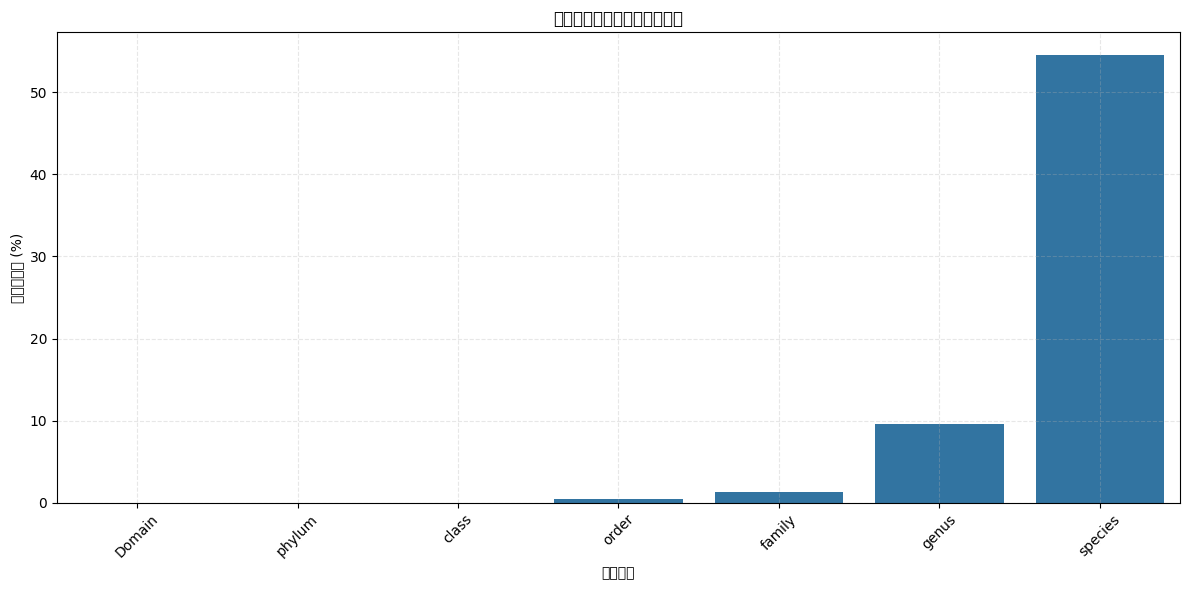

In [ ]:
# 物种完整性分析
# 检查species列的完整性
species_completeness = (data['species'].notna().sum() / len(data)) * 100
print(f"\n物种(species)列的完整性: {species_completeness:.2f}%")

# 分析每个层级的缺失情况
taxonomy_levels = ['Domain', 'phylum', 'class', 'order', 'family', 'genus', 'species']
missing_data = {level: (data[level].isna().sum() / len(data)) * 100 for level in taxonomy_levels}

plt.figure(figsize=(12, 6))
sns.barplot(x=list(missing_data.keys()), y=list(missing_data.values()))
plt.title('各分类层级的缺失数据百分比')
plt.xlabel('分类层级')
plt.ylabel('缺失百分比 (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1651998872.py:21: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1651998872.py:21: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1651998872.py:21: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1651998872.py:21: UserWarning: Glyph 32423 (\N{CJK UNIFIED IDEOGRAPH-7EA7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/1651998872.py:21: UserWarning: Glyph 23436 (\N{CJK UNIFIED IDEOGRAPH-5B8C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrb

<Figure size 1200x800 with 0 Axes>

/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23436 (\N{CJK UNIFIED IDEOGRAPH-5B8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25972 (\N{CJK UNIFIED IDEOGRAPH-6574}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30334 (\N{CJK UNIFIED IDEOGRAPH-767E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarnin

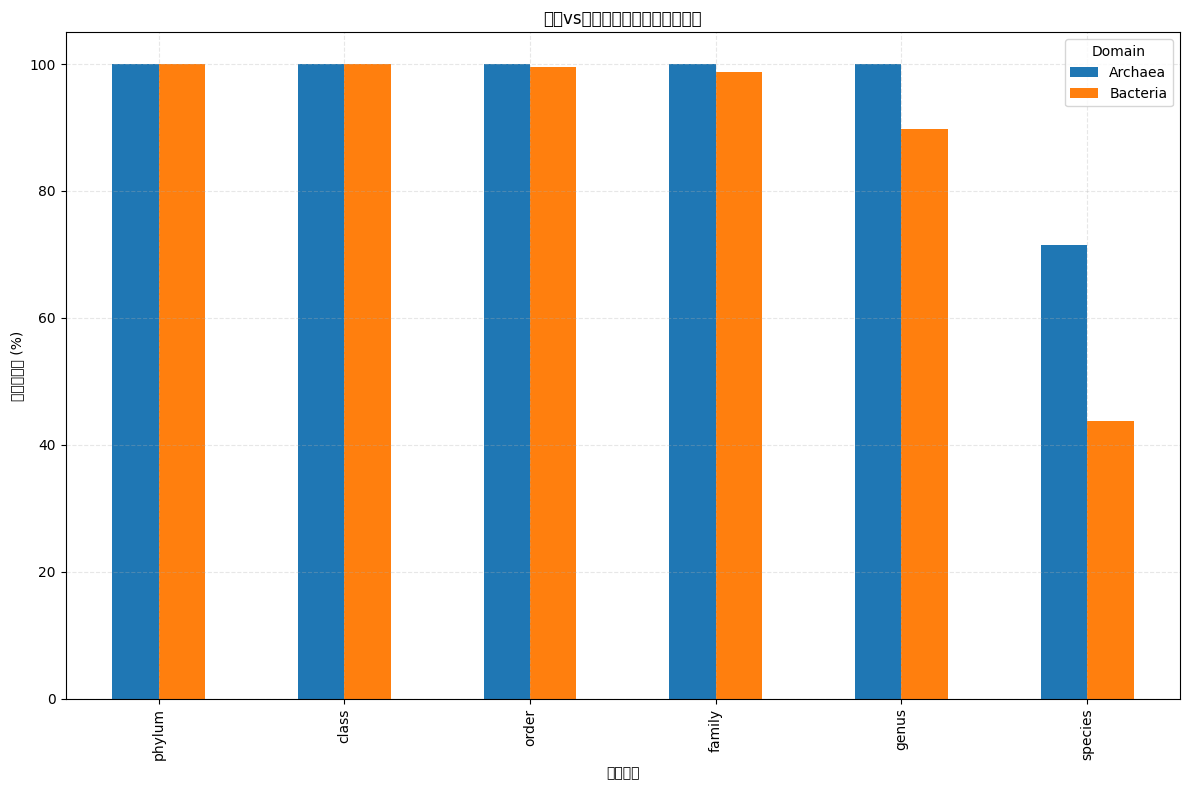

In [ ]:
#细菌vs古菌的分类层级比较
# 按Domain分组计算每个分类层级的完整性
domain_completeness = {}
for domain in data['Domain'].unique():
    domain_data = data[data['Domain'] == domain]
    domain_completeness[domain] = {
        level: (domain_data[level].notna().sum() / len(domain_data)) * 100 
        for level in taxonomy_levels[1:]  # 排除Domain本身
    }

# 转换为DataFrame以便可视化
completeness_df = pd.DataFrame(domain_completeness)

# 可视化
plt.figure(figsize=(12, 8))
completeness_df.plot(kind='bar', figsize=(12, 8))
plt.title('细菌vs古菌的分类信息完整性比较')
plt.xlabel('分类层级')
plt.ylabel('完整百分比 (%)')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(title='Domain')
plt.tight_layout()
plt.show()

共有 108 种不同的物种
物种出现次数统计:
species
UBA9949 sp012516785            2
Methanothrix soehngenii        1
JAAYLU01 sp018436785           1
Rhodococcus fascians           1
Stutzerimonas kunmingensis     1
                              ..
Azospira oryzae                1
UBA1422 sp002304835            1
CAIXSE01 sp012719015           1
Cloacimonas acidaminivorans    1
Vallitalea guaymasensis        1
Name: count, Length: 108, dtype: int64

前15个最常见的物种:
species
UBA9949 sp012516785               2
Methanothrix soehngenii           1
JAAYLU01 sp018436785              1
Rhodococcus fascians              1
Stutzerimonas kunmingensis        1
Flaviflexus salsibiostraticola    1
Bact-08 sp018053445               1
Peptostreptococcus russellii      1
UBA10566 sp023415495              1
Enterococcus_I lemanii            1
UBA5456 sp018433885               1
UBA1422 sp012515135               1
Sphaerochaeta sp001604325         1
JAAYIB01 sp012744295              1
Eubacterium_O aggregans           1
Name:

/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:40: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:40: UserWarning: Glyph 31181 (\N{CJK UNIFIED IDEOGRAPH-79CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:40: UserWarning: Glyph 21517 (\N{CJK UNIFIED IDEOGRAPH-540D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:40: UserWarning: Glyph 31216 (\N{CJK UNIFIED IDEOGRAPH-79F0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:40: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj12

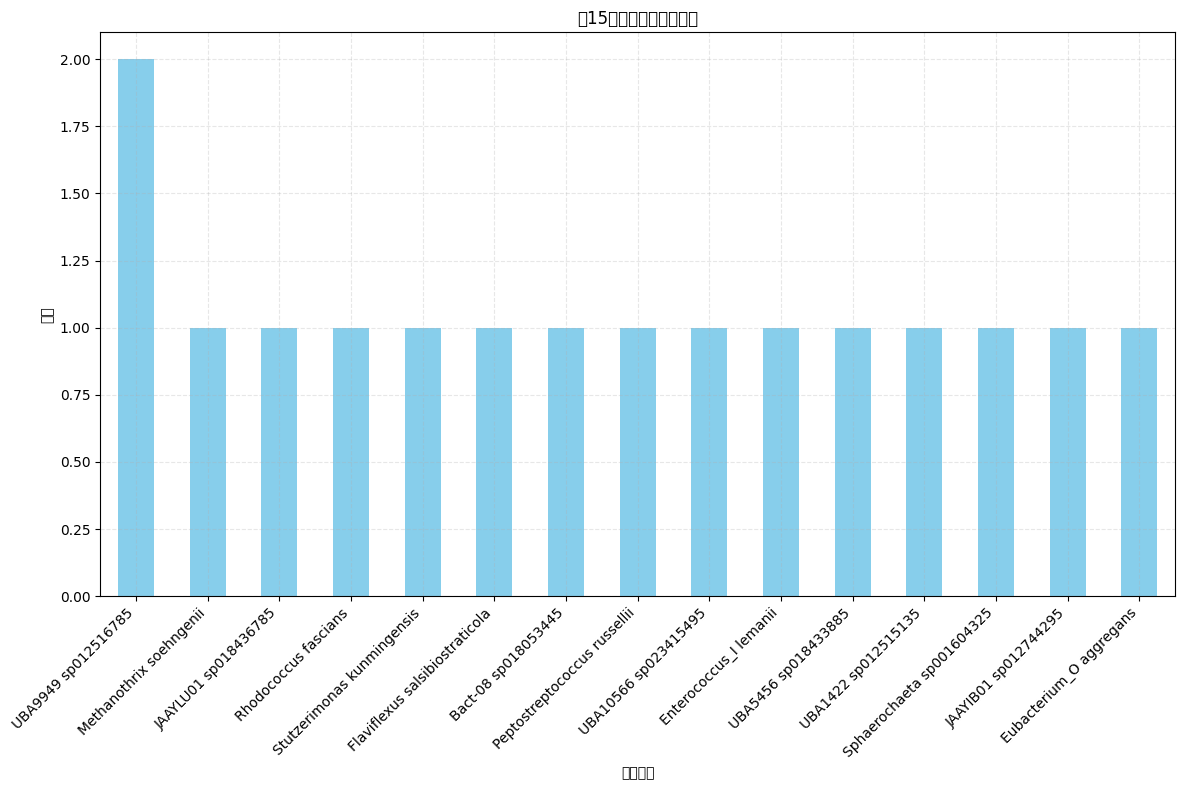

/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:50: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:50: UserWarning: Glyph 31181 (\N{CJK UNIFIED IDEOGRAPH-79CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:50: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:50: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:50: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj12

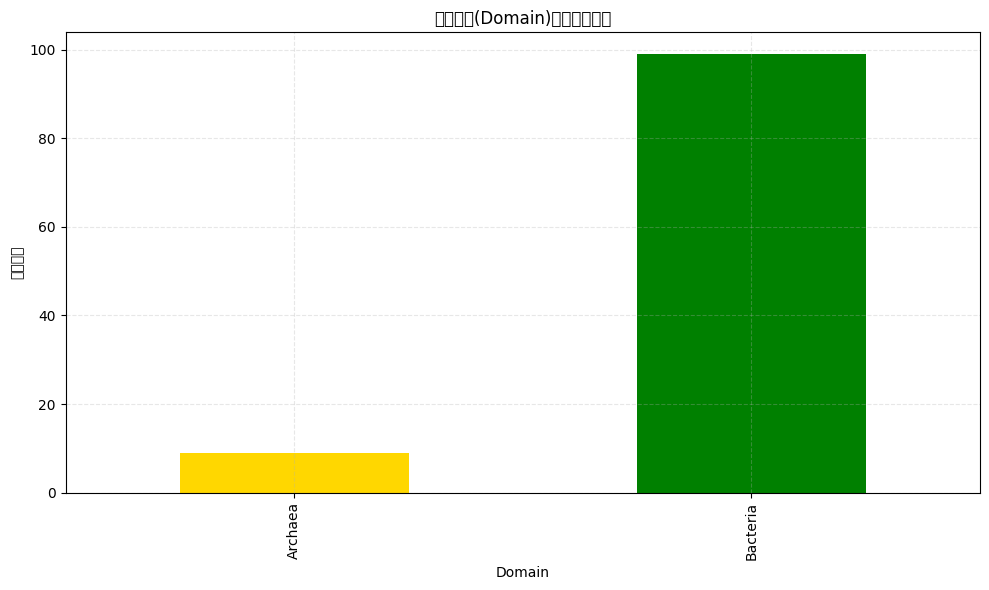


各物种拥有的基因组数量(前10):
species
UBA9949 sp012516785          2
Acetoanaerobium noterae      1
Petrimonas sp002356435       1
Sphaerochaeta sp001604325    1
Seramator thermalis          1
SR-FBR-E99 sp009881065       1
RumEn-M2 sp002506255         1
Rhodococcus fascians         1
Rectinema sp012516755        1
Rectinema sp003452735        1
Name: user_genome, dtype: int64


/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:77: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:77: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:77: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:77: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_10524/986106810.py:77: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj12

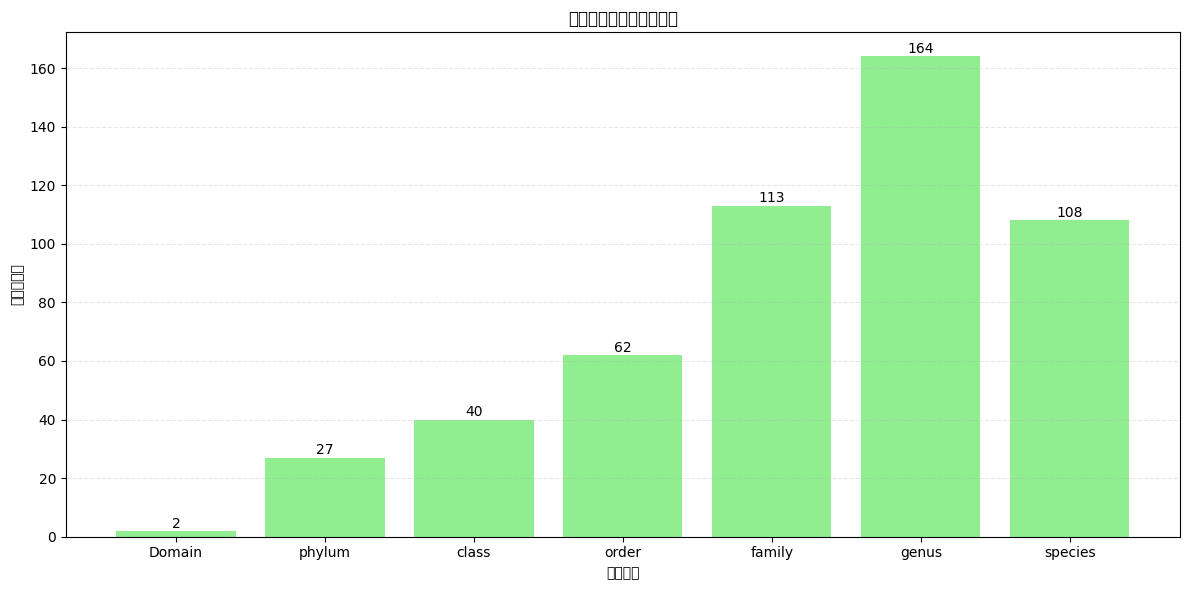

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
file_path = "/Users/azddza/Electromics-project/data/gtdb_taxonomy.tsv"
data = pd.read_csv(file_path, sep='\t')

# 创建一个包含所有完整物种名称的Series
species_data = data['species'].dropna()

# 统计不同物种的数量
species_counts = species_data.value_counts()
print(f"共有 {len(species_counts)} 种不同的物种")
print(f"物种出现次数统计:\n{species_counts}\n")

# 获取前15个最常见的物种
top_species = species_counts.head(15)
print(f"前15个最常见的物种:\n{top_species}\n")

# 统计每个物种只出现一次的比例
unique_species_ratio = (species_counts == 1).mean() * 100
print(f"只出现一次的物种占总物种的比例: {unique_species_ratio:.2f}%")

# 按Domain对物种进行分组统计
species_by_domain = data.groupby('Domain')['species'].apply(
    lambda x: x.dropna().nunique()
)
print(f"\n不同领域(Domain)的物种数量:\n{species_by_domain}")

# 可视化物种分布
plt.figure(figsize=(12, 8))
top_species.plot(kind='bar', color='skyblue')
plt.title('前15个最常见物种的分布')
plt.xlabel('物种名称')
plt.ylabel('数量')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 可视化Domain中的物种分布
plt.figure(figsize=(10, 6))
species_by_domain.plot(kind='bar', color=['gold', 'green'])
plt.title('不同领域(Domain)中物种的数量')
plt.xlabel('Domain')
plt.ylabel('物种数量')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 统计同一个物种(species)的不同基因组(user_genome)数量
species_genome_counts = data.dropna(subset=['species']).groupby('species')['user_genome'].nunique().sort_values(ascending=False)
print(f"\n各物种拥有的基因组数量(前10):\n{species_genome_counts.head(10)}")

# 统计不同分类水平的多样性
taxonomy_diversity = {}
for level in ['Domain', 'phylum', 'class', 'order', 'family', 'genus', 'species']:
    unique_taxa = data[level].dropna().nunique()
    taxonomy_diversity[level] = unique_taxa

# 可视化分类多样性
plt.figure(figsize=(12, 6))
bars = plt.bar(taxonomy_diversity.keys(), taxonomy_diversity.values(), color='lightgreen')
plt.title('各分类水平的分类群数量')
plt.xlabel('分类水平')
plt.ylabel('分类群数量')
plt.grid(True, alpha=0.3, linestyle='--', axis='y')

# 在柱状图上添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.show()